<a href="https://colab.research.google.com/github/fjadidi2001/Machine_Learning_Journey/blob/main/Machine_learning_FJ_S6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install ipywidgets
!jupyter nbextension enable --py widgetsnbextension

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 10.7 MB/s eta 0:00:00
Enabling notebook extension jupyter-js-widgets/extension...
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json
Paths used for configuration of notebook: 
    	
      - Validating: OK
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json


Install and enable the `ipywidgets` library, which allows you to create interactive widgets in your notebooks.

1. **`!pip install ipywidgets`**:
   - This command uses the `pip` package manager to install the `ipywidgets` library.
   - The `!` at the beginning indicates that this command should run in the shell (command line) instead of Python.
   - By installing `ipywidgets`, you can utilize various interactive controls like sliders, buttons, and dropdowns within your Jupyter Notebook.

2. **`!jupyter nbextension enable --py widgetsnbextension`**:
   - This command enables the Jupyter notebook extension that supports `ipywidgets`.
   - `nbextension` is a way to add additional features and functionalities to Jupyter Notebooks.
   - The `--py` flag specifies that you are enabling a Python extension.
   - After running this command, the interactive widgets will be fully functional in the Jupyter Notebook interface.



# What is the KNN algorithm?



The k-nearest neighbors (KNN) algorithm is a non-parametric, supervised learning classifier, which uses proximity to make classifications or predictions about the grouping of an individual data point. It is one of the popular and simplest classification and regression classifiers used in machine learning today.



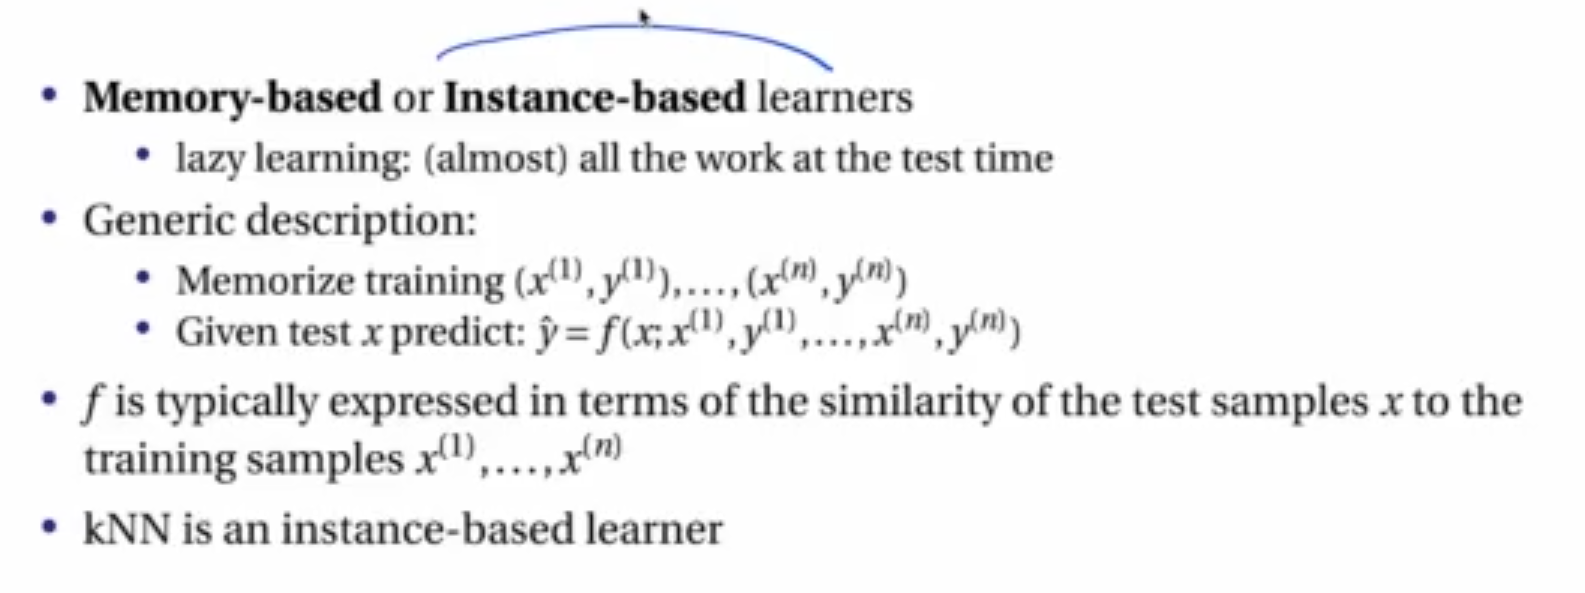

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.cm as cm

In [5]:
class KNNClassifier:
    def __init__(self, k=3, distance_func=None):
        self.k = k
        if distance_func is None:
            self.distance_func = self._euclidean_distance
        else:
            self.distance_func = distance_func

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def _euclidean_distance(self, x1, x2):
        return np.sqrt(np.sum((x1 - x2) ** 2))

    def _manhattan_distance(self, x1, x2):
        return np.sum(np.abs(x1 - x2))

    def _minkowski_distance(self, x1, x2, p=3):
        return np.sum(np.abs(x1 - x2) ** p) ** (1 / p)

    def predict(self, X):
        predictions = []
        for index, x in enumerate(X):
            distances = [self.distance_func(x, x_train) for x_train in self.X_train]

            # indices of the k nearest neighbors
            k_indices = np.argsort(distances)[:self.k]
            # labels of the k nearest neighbors
            k_neighbor_labels = self.y_train[k_indices]
            # majority vote
            counts = np.bincount(k_neighbor_labels.astype(int))
            predicted_label = np.argmax(counts)
            predictions.append(predicted_label)

        return np.array(predictions)

### Class Definition

- **`class KNNClassifier:`**: This line defines a class named `KNNClassifier`. A class is a blueprint for creating objects in Python.

### Constructor Method

- **`def __init__(self, k=3, distance_func=None):`**: This is the initializer method (constructor) that runs when an instance of `KNNClassifier` is created.
  - **`k=3`**: This parameter sets the default number of neighbors to consider (k) for the classification. If not specified, it defaults to 3.
  - **`distance_func=None`**: This optional parameter specifies a custom distance function. If no function is provided, it defaults to the Euclidean distance method.

- **`self.k = k`**: This line stores the value of `k` as an instance variable for use in other methods.

- **`if distance_func is None:`**: This condition checks if a custom distance function was provided.
  - **`self.distance_func = self._euclidean_distance`**: If no function is provided, it assigns a predefined Euclidean distance function (not shown in the snippet) to `self.distance_func`.
  - **`else:`**: If a custom function is provided:
  - **`self.distance_func = distance_func`**: It assigns the provided function to `self.distance_func`.

### Training Method

- **`def fit(self, X, y):`**: This method is intended to train the classifier using the training data.
  - **`self.X_train = X`**: It stores the training feature data (X) in an instance variable for later use in prediction.

### Prediction Logic (incomplete in the snippet)

- The commented-out section suggests that the method will carry out the following:
  - It will calculate the distance between the input features and the training points.
  - It will identify the k-nearest neighbors based on these distances.
  - It will retrieve the labels of these neighbors to conduct a majority vote to determine the predicted label for a given input.
  - Finally, it collects these predictions and returns them as a NumPy array.

### Summary
Overall, this `KNNClassifier` class is designed to allow you to classify data points based on their nearest neighbors. The object is initialized with a specific number of neighbors (`k`) and a distance function, wherein the default behavior is to use Euclidean distance if none is specified. The training data is stored in the `fit` method to later assist in making predictions.